In [1]:
myfile=r'/Users/lalitsachan/Dropbox/0.0 Data/winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.shape

(4898, 12)

In [4]:
wine=wine[["sulphates","alcohol"]]

In [5]:
wine.shape

(4898, 2)

In [6]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [7]:
wine.agg(['mean','std'])

,sulphates,alcohol
mean,0.489847,10.514267
std,0.114126,1.230621


In [8]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [10]:
wine_std=pd.DataFrame(st.fit_transform(wine),
                      columns=list(wine.columns))

In [11]:
wine_std.agg(['mean','std'])

,sulphates,alcohol
mean,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00


In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, 
                                            affinity='euclidean',
                                            linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.30910956895473835
For n_clusters = 3 The average silhouette_score is: 0.36507065689263013
For n_clusters = 4 The average silhouette_score is: 0.36394118955693916
For n_clusters = 5 The average silhouette_score is: 0.2849369402765109
For n_clusters = 6 The average silhouette_score is: 0.28173689619112985
For n_clusters = 7 The average silhouette_score is: 0.30584775050004287
For n_clusters = 8 The average silhouette_score is: 0.29918403546397854
For n_clusters = 9 The average silhouette_score is: 0.2931385252344828


In [15]:
hclus=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [16]:
labels_hclus=hclus.fit_predict(wine_std)

In [17]:
wine_std.head()

,sulphates,alcohol
0,-0.349184,-1.393152
1,0.001342,-0.824276
2,-0.436816,-0.336667
3,-0.787342,-0.499203
4,-0.787342,-0.499203


In [18]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [19]:
wine['cluster_hclus']=labels_hclus

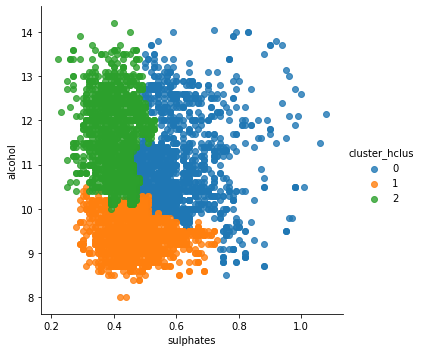

In [20]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [21]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [24]:
KMeans?

In [22]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.3739606160278498
3 0.4108733144046192
4 0.38593702093679005
5 0.33457661751536383
6 0.34757490320612566
7 0.35105059265658134
8 0.3540435471683544
9 0.35010561084441966


In [25]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
labels = kmeans.labels_
wine["cluster"]=labels

In [27]:
wine['cluster'].value_counts()

1    2281
2    1476
0    1141
Name: cluster, dtype: int64

In [28]:
wine.groupby(['cluster'])['sulphates','alcohol'].mean()

,sulphates,alcohol
cluster,,
0,0.646582,10.748785
1,0.457527,9.557394
2,0.418631,11.811721


In [29]:
import seaborn as sns

In [30]:
%matplotlib inline

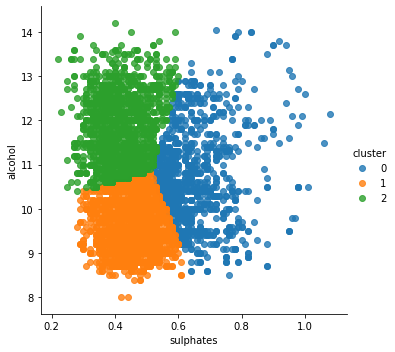

In [31]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [32]:
wine.head()

,sulphates,alcohol,cluster_hclus,cluster
0,0.45,8.8,1,1
1,0.49,9.5,1,1
2,0.44,10.1,1,1
3,0.40,9.9,1,1
4,0.40,9.9,1,1


# DBSCAN

In [33]:
mydata=pd.read_csv("/Users/lalitsachan/Dropbox/0.0 Data/moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


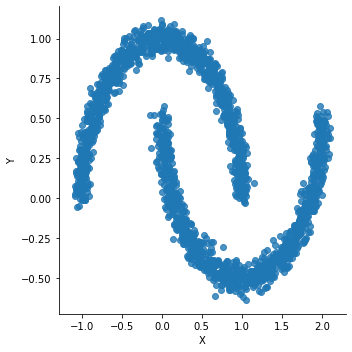

In [34]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

In [35]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

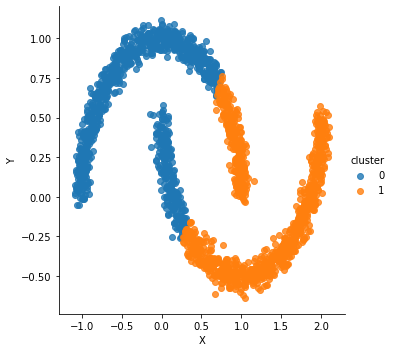

In [36]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
del mydata['cluster']

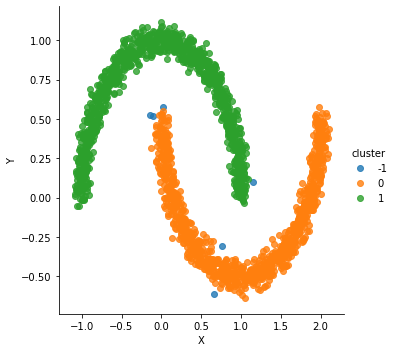

In [39]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)

mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


In [40]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

# anamoly detection with dbscan

In [41]:
myfile=r'/Users/lalitsachan/Dropbox/PDS V3/Data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

/Users/lalitsachan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  import sys


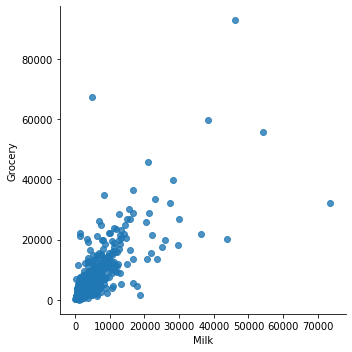

In [42]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [43]:
r=np.linspace(0.5,4,10)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.8888888888888888 , percentage of outliers is:  4.55
For epsilon = 1.2777777777777777 , percentage of outliers is:  2.05
For epsilon = 1.6666666666666667 , percentage of outliers is:  1.59
For epsilon = 2.0555555555555554 , percentage of outliers is:  1.36
For epsilon = 2.4444444444444446 , percentage of outliers is:  1.14
For epsilon = 2.8333333333333335 , percentage of outliers is:  0.91
For epsilon = 3.2222222222222223 , percentage of outliers is:  0.68
For epsilon = 3.611111111111111 , percentage of outliers is:  0.68
For epsilon = 4.0 , percentage of outliers is:  0.45


In [44]:
db = DBSCAN(eps=0.88, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

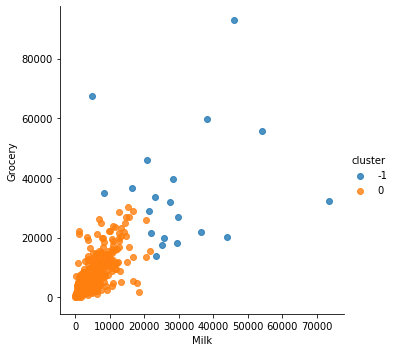

In [45]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')